In [2]:
import pandas as pd
df = pd.read_csv("movies.csv")

In [3]:
df.head()

,rank,id,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writter_name,writter_id,img_link
0,1,tt0111161,The Shawshank Redemption,1994,2601152,9.3,A,142,Drama,"nm0000209,nm0000151,nm0348409,nm0006669,nm0000...","Tim Robbins,Morgan Freeman,Bob Gunton,William ...",nm0001104,Frank Darabont,"Stephen King,Frank Darabont","nm0000175,nm0001104",https://m.media-amazon.com/images/M/MV5BMDFkYT...
1,2,tt0068646,The Godfather,1972,1796656,9.2,A,175,"Crime,Drama","nm0000008,nm0000199,nm0001001,nm0000473,nm0144...","Marlon Brando,Al Pacino,James Caan,Diane Keato...",nm0000338,Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola","nm0701374,nm0000338",https://m.media-amazon.com/images/M/MV5BM2MyNj...
2,3,tt0468569,The Dark Knight,2008,2572662,9.0,UA,152,"Action,Crime,Drama","nm0000288,nm0005132,nm0001173,nm0000323,nm0350...","Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",nm0634240,Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer","nm0634300,nm0634240,nm0275286",https://m.media-amazon.com/images/M/MV5BMTMxNT...
3,4,tt0071562,The Godfather Part II,1974,1237934,9.0,A,202,"Crime,Drama","nm0000199,nm0000134,nm0000380,nm0000473,nm0001...","Al Pacino,Robert De Niro,Robert Duvall,Diane K...",nm0000338,Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo","nm0000338,nm0701374",https://m.media-amazon.com/images/M/MV5BMWMwMG...
4,5,tt0050083,12 Angry Men,1957,768548,9.0,U,96,"Crime,Drama","nm0000020,nm0002011,nm0000842,nm0275835,nm0550...","Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",nm0001486,Sidney Lumet,Reginald Rose,nm0741627,https://m.media-amazon.com/images/M/MV5BMWU4N2...


### usuniecie czesci kolumn

In [4]:
if "img_link" in df.columns: df.drop(columns="img_link", inplace=True)
if "id" in df.columns: df.drop(columns="id", inplace=True)
if "cast_id" in df.columns: df.drop(columns="cast_id", inplace=True)
if "director_id" in df.columns: df.drop(columns="director_id", inplace=True)
if "writter_id" in df.columns: df.drop(columns="writter_id", inplace=True)

### funkcja do zmiany stringu w listę

In [5]:
def split_if_string(value):
    if isinstance(value, str):
        return value.split(',')
    return value # Return as is if not a string (e.g., already a list or NaN)

In [6]:
df['cast_name'] = df['cast_name'].apply(split_if_string)
df['writter_name'] = df['writter_name'].apply(split_if_string)
df['director_name'] = df['director_name'].apply(split_if_string)
df['genre'] = df['genre'].apply(split_if_string)

In [7]:
df.head()

,rank,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_name,director_name,writter_name
0,1,The Shawshank Redemption,1994,2601152,9.3,A,142,[Drama],"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",[Frank Darabont],"[Stephen King, Frank Darabont]"
1,2,The Godfather,1972,1796656,9.2,A,175,"[Crime, Drama]","[Marlon Brando, Al Pacino, James Caan, Diane K...",[Francis Ford Coppola],"[Mario Puzo, Francis Ford Coppola]"
2,3,The Dark Knight,2008,2572662,9.0,UA,152,"[Action, Crime, Drama]","[Christian Bale, Heath Ledger, Aaron Eckhart, ...",[Christopher Nolan],"[Jonathan Nolan, Christopher Nolan, David S. G..."
3,4,The Godfather Part II,1974,1237934,9.0,A,202,"[Crime, Drama]","[Al Pacino, Robert De Niro, Robert Duvall, Dia...",[Francis Ford Coppola],"[Francis Ford Coppola, Mario Puzo]"
4,5,12 Angry Men,1957,768548,9.0,U,96,"[Crime, Drama]","[Henry Fonda, Lee J. Cobb, Martin Balsam, John...",[Sidney Lumet],[Reginald Rose]


In [8]:
MorganDF = df[df['cast_name'].apply(lambda x: 'Morgan Freeman' in x)]

In [9]:
MorganDF.head()

,rank,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_name,director_name,writter_name
0,1,The Shawshank Redemption,1994,2601152,9.3,A,142,[Drama],"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",[Frank Darabont],"[Stephen King, Frank Darabont]"
2,3,The Dark Knight,2008,2572662,9.0,UA,152,"[Action, Crime, Drama]","[Christian Bale, Heath Ledger, Aaron Eckhart, ...",[Christopher Nolan],"[Jonathan Nolan, Christopher Nolan, David S. G..."
18,19,Se7en,1995,1596843,8.6,A,127,"[Crime, Drama, Mystery]","[Morgan Freeman, Brad Pitt, Kevin Spacey, Andr...",[David Fincher],[Andrew Kevin Walker]
69,70,The Dark Knight Rises,2012,1661234,8.4,UA,164,"[Action, Drama]","[Christian Bale, Tom Hardy, Anne Hathaway, Gar...",[Christopher Nolan],"[Jonathan Nolan, Christopher Nolan, David S. G..."
126,127,Batman Begins,2005,1434049,8.2,UA,140,"[Action, Crime, Drama]","[Christian Bale, Michael Caine, Ken Watanabe, ...",[Christopher Nolan],"[Bob Kane, David S. Goyer, Christopher Nolan]"


In [10]:
df["duration"].tolist

<bound method IndexOpsMixin.tolist of 0      142
1      175
2      152
3      202
4       96
      ... 
245    164
246     90
247    191
248    146
249     84
Name: duration, Length: 250, dtype: object>

In [11]:
df.dtypes

rank               int64
name              object
year               int64
imbd_votes         int64
imdb_rating      float64
certificate       object
duration          object
genre             object
cast_name         object
director_name     object
writter_name      object
dtype: object

In [12]:
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

In [13]:
bins = [0, 60, 90, 120, 150, 180, float('inf')]
labels = [0, 1, 2, 3, 4, 5]
#labels = ['very short', 'short', 'normal', 'pretty long', 'long', 'very long']


df['duration_category'] = pd.cut(df['duration'], bins=bins, labels=labels, right=False)


In [14]:
df['duration_category'] = pd.to_numeric(df['duration_category'], errors='coerce')

In [15]:
df["duration_category"].value_counts()

duration_category
3.0    98
2.0    82
4.0    38
1.0    16
5.0    14
0.0     1
Name: count, dtype: int64

In [16]:
df["certificate"].value_counts()

certificate
U            79
A            74
UA           47
Passed       13
R             9
Not Rated     8
G             4
PG            3
7             3
18            3
Approved      2
13            1
15+           1
12+           1
16            1
Name: count, dtype: int64

In [17]:
df.isnull().sum()

rank                 0
name                 0
year                 0
imbd_votes           0
imdb_rating          0
certificate          1
duration             1
genre                0
cast_name            0
director_name        0
writter_name         0
duration_category    1
dtype: int64

In [18]:
df.describe(include='all')

,rank,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_name,director_name,writter_name,duration_category
count,250.000000,250,250.000000,2.500000e+02,250.000000,249,249.000000,250,250,250,250,249.000000
unique,NaN,250,NaN,NaN,NaN,15,NaN,107,250,161,233,NaN
top,NaN,The Shawshank Redemption,NaN,NaN,NaN,U,NaN,[Drama],"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",[Christopher Nolan],[Charles Chaplin],NaN
freq,NaN,1,NaN,NaN,NaN,79,NaN,19,1,7,4,NaN
mean,125.500000,NaN,1986.456000,6.204287e+05,8.311200,NaN,128.843373,NaN,NaN,NaN,NaN,2.795181
std,72.312977,NaN,25.214423,5.014117e+05,0.229445,NaN,29.909062,NaN,NaN,NaN,NaN,0.980771
min,1.000000,NaN,1921.000000,2.868000e+04,8.000000,NaN,45.000000,NaN,NaN,NaN,NaN,0.000000
25%,63.250000,NaN,1966.250000,2.099448e+05,8.100000,NaN,107.000000,NaN,NaN,NaN,NaN,2.000000
50%,125.500000,NaN,1994.000000,4.823150e+05,8.250000,NaN,126.000000,NaN,NaN,NaN,NaN,3.000000
75%,187.750000,NaN,2006.750000,9.356730e+05,8.400000,NaN,145.000000,NaN,NaN,NaN,NaN,3.000000


# Przygotowanie pod Drzewo losowe

### usuniecie nazw, oraz rank

In [19]:
if "name" in df.columns: df.drop(columns="name", inplace=True)
if "rank" in df.columns: df.drop(columns="rank", inplace= True)

### function for one-hot encoding

In [20]:
def one_hot_encode (DataFrame, column_names, prefixes):
    dfInWork = DataFrame
    for column_name, prefix in zip(column_names, prefixes):
        if column_name in dfInWork.columns: 
            df_exploded = dfInWork[column_name].explode()
            df_dummies = pd.get_dummies(df_exploded, prefix=prefix)
            df_genres_encoded = df_dummies.groupby(df_dummies.index).max()
            df_final = pd.merge(dfInWork, df_genres_encoded, left_index=True, right_index=True, how='left')
            dfInWork = df_final.drop(column_name, axis=1)
        else:
            print(f"ERROR, column {column_name} non existing")
    return dfInWork


In [21]:
df = one_hot_encode(df, ("genre", "cast_name", "writter_name", "director_name"), prefixes = ("g_", "c_", "w_", "d_") )


In [22]:
df.head()

,year,imbd_votes,imdb_rating,certificate,duration,duration_category,g__Action,g__Adventure,g__Animation,g__Biography,...,d__Tom McCarthy,d__Tony Kaye,d__Victor Fleming,d__Vittorio De Sica,d__Wes Anderson,d__William Friedkin,d__William Wyler,d__Wolfgang Petersen,d__Yasujirô Ozu,d__Éric Toledano
0,1994,2601152,9.3,A,142.0,3.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1972,1796656,9.2,A,175.0,4.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2008,2572662,9.0,UA,152.0,4.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1974,1237934,9.0,A,202.0,5.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1957,768548,9.0,U,96.0,2.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
df["certificate"].astype("category")

0       A
1       A
2      UA
3       A
4       U
       ..
245     A
246     U
247     U
248    UA
249     U
Name: certificate, Length: 250, dtype: category
Categories (15, object): ['12+', '13', '15+', '16', ..., 'Passed', 'R', 'U', 'UA']

In [24]:
certificate_numbers = ([])
certificate_labels = df["certificate"].unique()

i = 0
for unique in certificate_labels:
    certificate_numbers.append(i)
   # certificate_labels.append(unique)
    i+=1

label_to_number_map = dict(zip(certificate_labels, certificate_numbers))

mapping = {
    "certificate": label_to_number_map
}

df.replace(mapping, inplace=True)



C:\Users\kubah\AppData\Local\Temp\ipykernel_5820\3106441032.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mapping, inplace=True)


In [25]:
df = df.drop(columns="duration_category")

### pozbycie się nulli

In [26]:
df.isnull().sum()

year                    0
imbd_votes              0
imdb_rating             0
certificate             0
duration                1
                       ..
d__William Friedkin     0
d__William Wyler        0
d__Wolfgang Petersen    0
d__Yasujirô Ozu         0
d__Éric Toledano        0
Length: 4472, dtype: int64

In [27]:
df = df.dropna()

### pozbycie się ciągłości

In [28]:
df["imdb_rating"] *=10

In [29]:

df.replace(mapping, inplace=True)
for i in df.columns:
    if df[i].dtype == 'float64':
        df[i] = df[i].astype('int64')

# Split The DataSet

In [31]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image

X = df.drop('imdb_rating', axis=1)
y = df['imdb_rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train & test the dataset

In [85]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [86]:
accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred)
print("Accuracy: ", accuracy)
#print("precision: ", precision)

Accuracy:  0.26


In [87]:
avgOdchyl = 0.0
avgProbe = 0.0
counter = 0
for probe1,probe2 in zip(y_test, y_pred):
    avgOdchyl += abs(1-probe1/probe2)
    avgProbe +=probe1
    counter += 1
print(counter)
print(f"test: {avgProbe}")
print("Alive")
avgOdchyl /= counter
avgProbe /= counter
print(f"najmniejsza próbka: {y_test.min()}")
print(f"największa próbka: {y_test.max()}")
print(f" średnie odchylenie: {avgOdchyl}")
print(f"średnia próbka: {avgProbe}")
#print(f"{probe1} vs {probe2}: {1-probe1/probe2}")

50
test: 4168.0
Alive
najmniejsza próbka: 81
największa próbka: 90
 średnie odchylenie: 0.023745442945658456
średnia próbka: 83.36


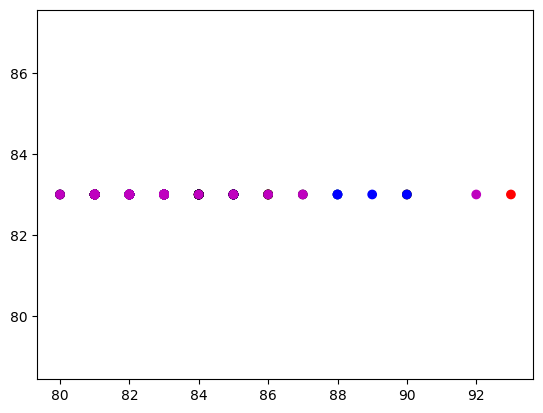

In [109]:
import matplotlib.pyplot as plt
indexer = np.arange(0,50,1)
#ax = plt.figure().add_subplot(projection='3d')
#ax.plot(y_test, y_pred, zs=0, zdir='z', label='curve in (x, y)')

colors = ('r', 'g', 'b', 'k', 'm')
c_list = []
for c in colors:
    c_list.extend([c] * 30)
c_list.pop()

plt.scatter(y_train, y_pred, c=c_list, label='points in (x, z)')

In [107]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,

                    hidden_layer_sizes=(50, 50), random_state=5)


clf.fit(X_train, y_train)

c:\Users\kubah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(50, 50), random_state=5,
              solver='lbfgs')

In [108]:
y_pred = clf.predict(X_train)

# TODO: 
### zdyskretyzuj długość trwania, rok produkcji oraz liczbę głosów i sprawdź czy teraz lepiej przewiduje wynik